In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Copy of 2P2G_books.csv")
df.head()

,title,author,publication_date,publisher,genre,rating,page_count,copies_sold,copies_printed
0,Niner,Emma Wilson,07/16/2020,Random House,Horror,91.0,290,59962,76727
1,Bukowski: Born into This,Emily Johnson,05/12/1900,Wiley,Drama,70.0,254,91028,154440
2,Prinsessa Ruusunen,David Thompson,01/11/1994,Pearson,Mystery,89.7,292,53316,73324
3,18 Again!,Ava Moore,04/15/1933,Wiley,Thriller,77.0,306,65695,100153
4,"Princess for Christmas, A",David Thompson,11/26/1978,Pearson,Thriller,95.1,304,43587,68920


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             100 non-null    object 
 1   author            100 non-null    object 
 2   publication_date  100 non-null    object 
 3   publisher         100 non-null    object 
 4   genre             100 non-null    object 
 5   rating            100 non-null    float64
 6   page_count        100 non-null    int64  
 7   copies_sold       100 non-null    int64  
 8   copies_printed    100 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.2+ KB


In [4]:
df.shape

(100, 9)

In [5]:
# Calculate the average rating for each genre
genre_avg_rating = df.groupby('genre')['rating'].mean()
print(genre_avg_rating)
# Find the genre with the highest average rating
highest_avg_rating_genre = genre_avg_rating.idxmax()
# highest_avg_rating_genre
highest_avg_rating = genre_avg_rating.max()
# highest_avg_rating
print(f"The genre with the highest average rating is '{highest_avg_rating_genre}' with an average rating of {highest_avg_rating:.2f}.")

genre
Action       81.145455
Adventure    75.075000
Comedy       72.300000
Drama        77.546667
Fantasy      79.740000
Horror       74.628571
Mystery      73.760000
Romance      71.427273
Sci-Fi       77.918182
Thriller     80.446154
Name: rating, dtype: float64
The genre with the highest average rating is 'Action' with an average rating of 81.15.


In [6]:
# Calculate summary statistics for ratings by publisher
ratings_by_publisher = df.groupby('publisher')['rating'].count().sort_values(ascending=False)

print("Summary statistics for ratings by publisher:")
print(ratings_by_publisher)

Summary statistics for ratings by publisher:
publisher
Pearson                    13
Wiley                      13
Macmillan                  12
Hachette Book Group        11
Simon & Schuster           11
Oxford University Press    10
Scholastic                 10
Penguin Random House        9
HarperCollins               6
Random House                5
Name: rating, dtype: int64


In [7]:
print(type(df['title']))
# type(df['title'].values)

<class 'pandas.core.series.Series'>


In [8]:
# Basic Information
print("Titles of the books in the dataset:")
print("--------------------------------------------------------------------------------------------------------------------------")
print(type(df['title'].tolist()))

Titles of the books in the dataset:
--------------------------------------------------------------------------------------------------------------------------
<class 'list'>


In [9]:
print("\nGenre with the highest number of copies printed on average:")
genre_avg_copies_printed = df.groupby('genre')['copies_printed'].mean()
print()
print(genre_avg_copies_printed)
print()
print(genre_avg_copies_printed.idxmax())


Genre with the highest number of copies printed on average:

genre
Action       100612.545455
Adventure     68971.500000
Comedy        72378.857143
Drama         85874.800000
Fantasy      107800.000000
Horror        95875.500000
Mystery       77165.200000
Romance      109260.272727
Sci-Fi        63822.272727
Thriller      93013.769231
Name: copies_printed, dtype: float64

Romance


In [10]:
df.title.value_counts

<bound method IndexOpsMixin.value_counts of 0                            Niner
1         Bukowski: Born into This
2               Prinsessa Ruusunen
3                        18 Again!
4        Princess for Christmas, A
                  ...             
95              Perfumed Nightmare
96                     Royal Flash
97                        Out Cold
98    Rally 'Round the Flag, Boys!
99                 Detective Story
Name: title, Length: 100, dtype: object>

In [11]:
total_copies_sold_by_title = df.groupby("title")["copies_sold"].sum().reset_index().sort_values(by="copies_sold", ascending=False)

# print(total_copies_sold_by_title)

# total_copies_sold_df = total_copies_sold_by_title.to_frame(name="total_copies_sold")
# total_copies_sold_df

# If you want to convert it to a DataFrame with a specific column name, you can do it like this:
total_copies_sold_df = total_copies_sold_by_title.rename(columns={"copies_sold": "total_copies_sold"})
total_copies_sold_df

,title,total_copies_sold
83,Scenes from the Class Struggle in Beverly Hills,99142
34,Finding Joy,99069
64,Ordet,97663
99,Yesterday Girl,97206
26,Dry Summer,96398
...,...,...
39,Hostel: Part II,23227
41,How to Be,22833
70,Path to War,21751
16,Carless Love,20419


In [12]:
total_copies_sold_by_title = df.groupby("title")["copies_sold"].sum()
most_sold_title = total_copies_sold_by_title.idxmax()
most_sold_num = total_copies_sold_by_title.max()

print("The most sold book title is: " + most_sold_title + " with " + str(most_sold_num) + " read/sold ")

The most sold book title is: Scenes from the Class Struggle in Beverly Hills with 99142 read/sold 


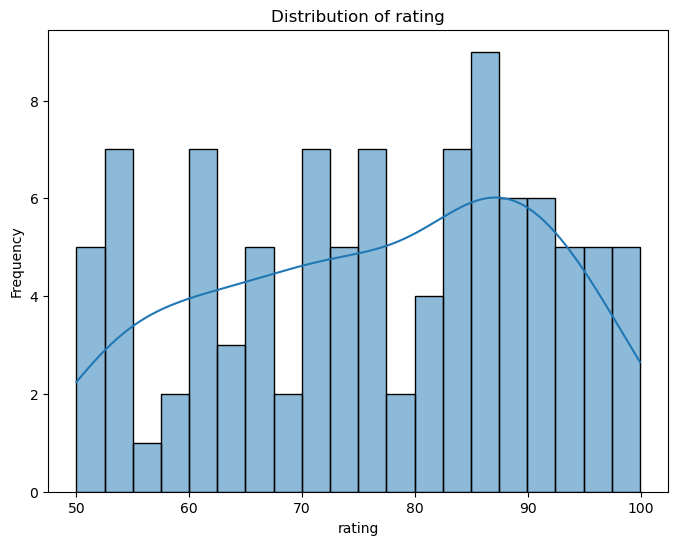

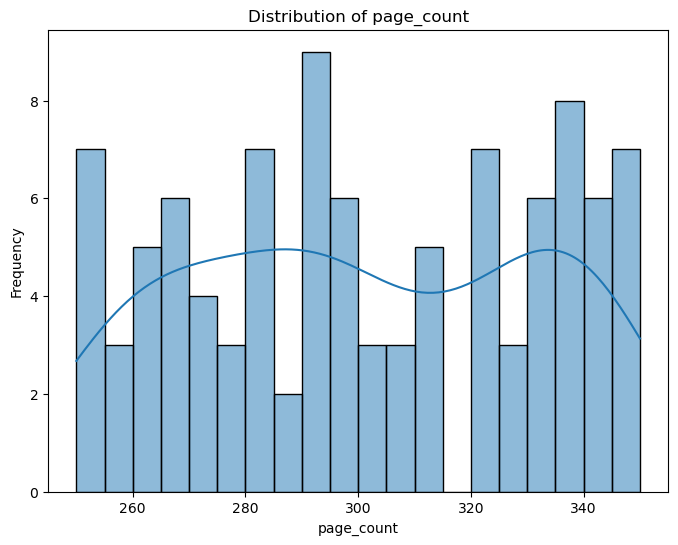

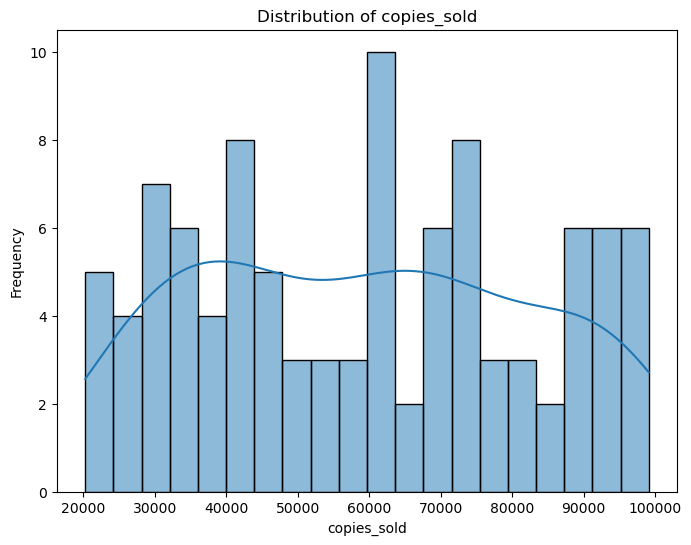

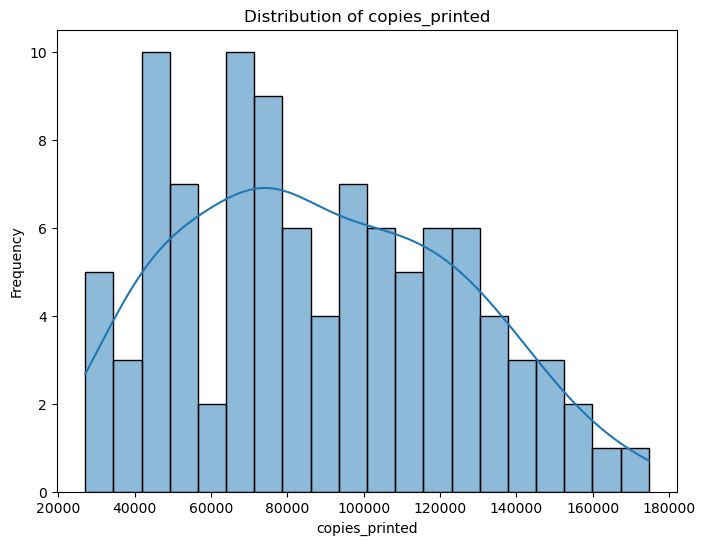

In [13]:
# Distribution of numerical features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'page_count'}>],
       [<Axes: title={'center': 'copies_sold'}>,
        <Axes: title={'center': 'copies_printed'}>]], dtype=object)

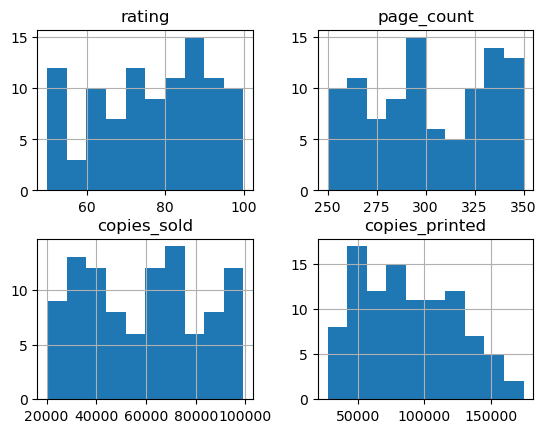

In [14]:
df.hist()

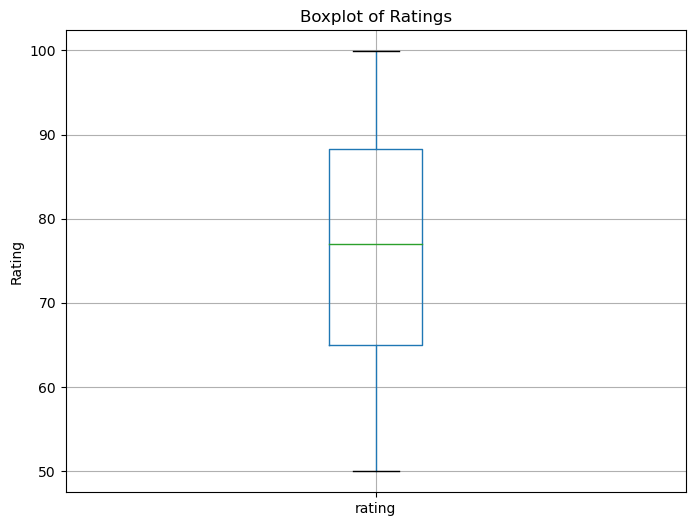

In [15]:
# are there any outiers in the rating feature?
df.boxplot(column='rating', figsize=(8,6))
plt.title('Boxplot of Ratings')
plt.ylabel('Rating')
plt.show()

C:\Users\kairu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


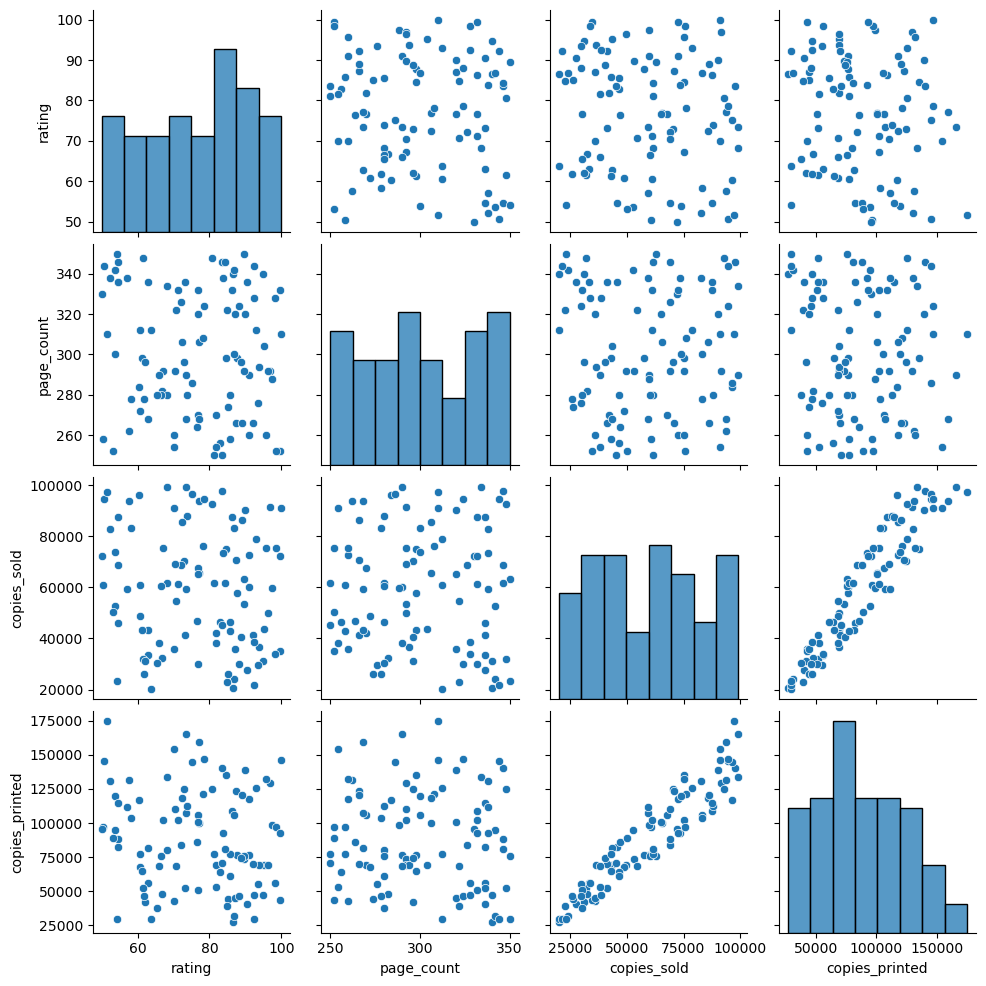

<Figure size 600x600 with 0 Axes>

In [16]:
# Pairplot to visualize relationships between numerical features
# pd.plotting.scatter_matrix()
sns.pairplot(df)
plt.figure(figsize=(6,6))
plt.show()

Index(['rating', 'page_count', 'copies_sold', 'copies_printed'], dtype='object')


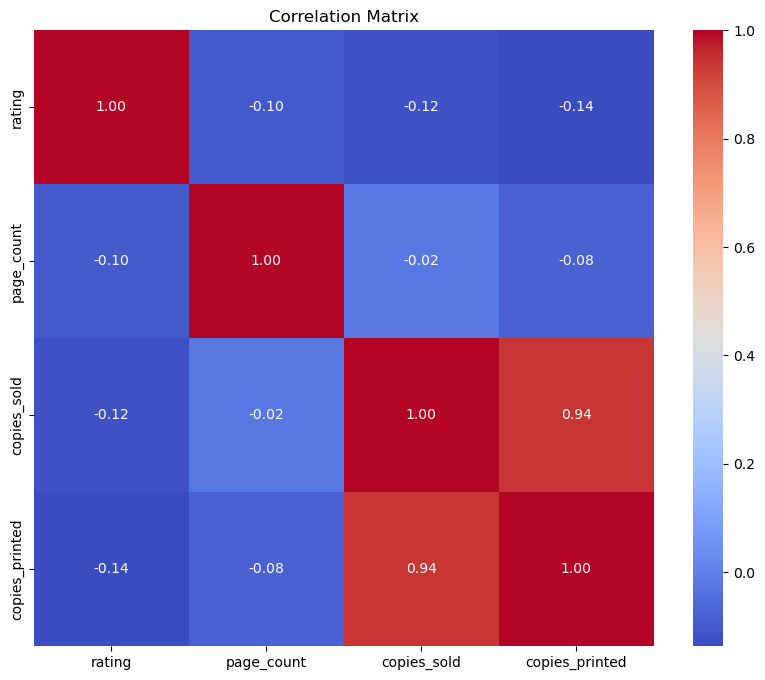

In [24]:
# Correlation matrix
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(numeric_df.columns)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# * **Rating vs. Page Count:** There is a slight negative correlation (-0.099824) between rating and page count. This suggests that books with higher page counts tend to have slightly lower ratings.
# * **Rating vs. Copies Sold/Printed:** There is a weak negative correlation between rating and copies sold (-0.121207) as well as copies printed (-0.136620). This indicates that higher rated books tend to sell and be printed slightly less.
# * **Copies Sold vs. Copies Printed:** There is a very strong positive correlation (0.939689) between copies sold and copies printed. This makes sense, as we would expect the number of copies printed to be closely related to the number of copies sold.

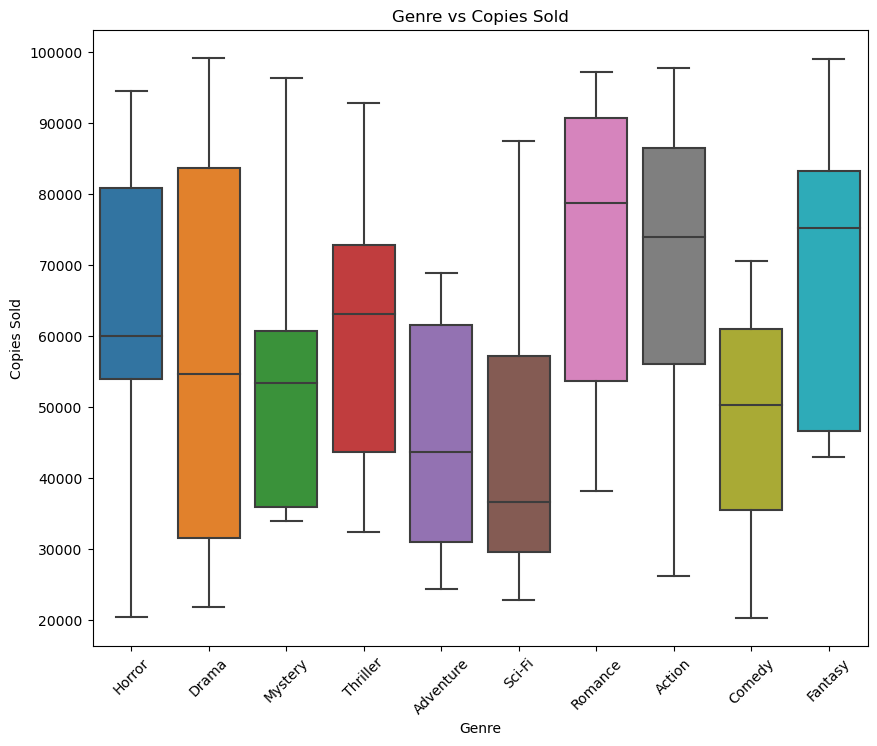

In [25]:
# Boxplot to visualize the distribution of categorical data
plt.figure(figsize=(10, 8))
sns.boxplot(x='genre', y='copies_sold', data=df)
plt.title('Genre vs Copies Sold')
plt.xlabel('Genre')
plt.ylabel('Copies Sold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Basic Information
print("Titles of the books in the dataset:")
print(df['title'].tolist())

print("\nAuthors of the books in the dataset:")
print(df['author'].tolist())

print("\nPublication dates of the books in the dataset:")
print(df['publication_date'].tolist())

print("\nPublishers represented in the dataset:")
print(df['publisher'].unique().tolist())

# Statistical Analysis
print("\nAverage rating of the books:", df['rating'].mean())
print("Median page count of the books:", df['page_count'].median())
print("Total number of copies sold across all books:", df['copies_sold'].sum())
print("Maximum number of copies printed for a single book:", df['copies_printed'].max())

# Genre Analysis
print("\nNumber of books belong to each genre:")
print(df['genre'].value_counts())

print("\nGenre with the highest average rating:")
genre_avg_rating = df.groupby('genre')['rating'].mean()
print(genre_avg_rating.idxmax())

print("\nTotal number of copies sold for books in each genre:")
genre_copies_sold = df.groupby('genre')['copies_sold'].sum()
print(genre_copies_sold)

print("\nGenre with the highest number of copies printed on average:")
genre_avg_copies_printed = df.groupby('genre')['copies_printed'].mean()
print(genre_avg_copies_printed.idxmax())

# Comparisons
print("\nRatings of books published by different publishers:")
print(df.groupby('publisher')['rating'].describe())

print("\nPage counts of books belonging to different genres:")
print(df.groupby('genre')['page_count'].describe())

print("\nNumber of copies sold for books with different ratings:")
print(df.groupby(pd.cut(df['rating'], bins=5))['copies_sold'].sum())

# Trends and Insights
print("\nCorrelation between publication date and rating:")
print(df['publication_date'].corr(df['rating'], method='pearson'))

print("\nRelationship between page count and number of copies sold:")
print(df['page_count'].corr(df['copies_sold'], method='pearson'))

# No code for identifying certain genres more likely to have higher ratings or sales figures as it requires more complex analysis

# Outliers and Anomalies
genre_avg_rating = df.groupby('genre')['rating'].mean()
df['avg_genre_rating'] = df['genre'].map(genre_avg_rating)

print("\nBooks with exceptionally high or low ratings compared to their genre averages:")
print(df[(df['rating'] > df['avg_genre_rating'] + 10) | (df['rating'] < df['avg_genre_rating'] - 10)][['title', 'author', 'genre', 'rating', 'avg_genre_rating']])

# No code for identifying books that have sold significantly more or fewer copies than expected based on their genre or publication date as it requires more detailed analysis
